In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#loading data
file_path = r"C:\Users\user\Downloads\spam.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, encoding="latin1")

# Display the first few rows of the DataFrame
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# rename relevant columns
data = data[['v1', 'v2']]
data = data.rename(columns={'v1':'status',
                           'v2':'mail'})
data.head()

,status,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# check missing values
data.isnull().sum()

status    0
mail      0
dtype: int64

In [5]:
#checking counts for status column
data['status'].value_counts()

ham     4825
spam     747
Name: status, dtype: int64

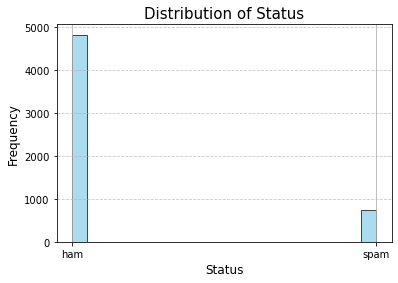

In [6]:
# histogram of status
data['status'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Distribution of Status', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [7]:
# sample of mail
data['mail'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [8]:
def clean_mail(mail):
     #removing special characters
    pattern = r'[^a-zA-Z0-9\s]'
    mail = re.sub(pattern, '', mail)
    mail = str.lower(mail)
    return mail

In [9]:
#applying special fuction
data['mail'] = data['mail'].apply(clean_mail)

In [10]:
# defining the target variable
x = np.array(data['mail'])
y = np.array(data['status'])

# instanciating the count vectorizer
cv = CountVectorizer()

# fitting features into vectorizer
x = cv.fit_transform(x)

# spliting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision tree classifier

In [11]:
# instantiating the decision tree classifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, pred1)
print(f'The accuracy score for decision tree classifer is: {acc1}')

The accuracy score for decision tree classifer is: 0.9650224215246637


In [12]:
# fuction to run predictions
def check(mail,model):
    mail = cv.transform([mail]).toarray()
    pred = model.predict(mail)
    return(pred[0])

# Tuning decision tree classifier

In [13]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# You can also print the best parameters found
print("Best parameters:", best_params)

Accuracy on test set: 0.9623318385650225
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


# Random forest classifier

In [15]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, pred2)
print(f'The accuracy score for random forest classifer is: {acc2}')

The accuracy score for random forest classifer is: 0.9704035874439462


# Tuned Random Forest

In [16]:
param_grid2 = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Grid search using cross-validation
grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid2, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search2.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search2.best_params_)

# Evaluate performance on test data
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packages\sk

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Test Accuracy: 0.9623318385650225


# logistic regression model

In [20]:
# instanciating logistic regression model
model3 = LogisticRegression()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
acc3 = accuracy_score(y_test, pred3)
print(f'The accuracy score for logistic regression is: {acc3}')

The accuracy score for logistic regression is: 0.9775784753363229


# Tune logistic regression

In [19]:
param_grid3 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create logistic regression classifier
lr = LogisticRegression(random_state=42, max_iter=1000)

# Grid search using cross-validation
grid_search3 = GridSearchCV(estimator=lr, param_grid=param_grid3, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search3.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search3.best_params_)

# Evaluate performance on test data
best_lr = grid_search3.best_estimator_
test_accuracy3 = best_lr.score(X_test, y_test)
print("Test Accuracy:", test_accuracy3)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.979372197309417


# KNeighbors classifier

In [21]:
#instanciating k neighbors classifier
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
acc4 = accuracy_score(y_test, pred4)
print(f'The accuracy score for kneighbor classifer is: {acc4}')

The accuracy score for kneighbor classifer is: 0.9210762331838565


# Tune kneighbors classifier

In [22]:
# Define parameter grid
param_grid4 = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN classifier
knn = KNeighborsClassifier()

# Grid search using cross-validation
grid_search4 = GridSearchCV(estimator=knn, param_grid=param_grid4, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search4.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search4.best_params_)

# Evaluate performance on test data
best_knn = grid_search4.best_estimator_
test_accuracy4 = best_knn.score(X_test, y_test)
print("Test Accuracy:", test_accuracy4)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.9497757847533632


In [23]:
models = ['DecisionTreeClassifier','Tuned DecisionTreeClassifier', 'RandomForestClassifier', 'Tuned RandomForestClassifier', 'LogisticRegression', 'Tuned LogisticRegression', 'KNeighborsClassifier', 'Tuned KNeighborsClassifer']
accuracy_scores = [acc1, accuracy, acc2, test_accuracy, acc3, test_accuracy3, acc4, test_accuracy4]
 
# Create a dataframe
df = pd.DataFrame({
    'Model': models,
    'Accuracy Score': accuracy_scores
})

# Display the dataframe
df.head(8)

,Model,Accuracy Score
0,DecisionTreeClassifier,0.965022
1,Tuned DecisionTreeClassifier,0.962332
2,RandomForestClassifier,0.970404
3,Tuned RandomForestClassifier,0.962332
4,LogisticRegression,0.977578
5,Tuned LogisticRegression,0.979372
6,KNeighborsClassifier,0.921076
7,Tuned KNeighborsClassifer,0.949776


In [24]:
import pickle
pickle.dump(best_lr, open('spam_model.pkl', 'wb'))
pickle.dump(cv, open('vectorizer_spam.pkl', 'wb'))